In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from pycytominer.cyto_utils import infer_cp_features
import seaborn as sns
from sklearn.decomposition import PCA

In [10]:
eff = pd.read_csv('/Users/mbornhol/git/neural-profiling/pre-trained/efficient_net/aggregated/aggregated_efficientnet_median.csv')
res = pd.read_csv('aggregated_resnet_median.csv')
cp = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level3_featselected_500_nadropped.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
eff_features = [feat for feat in eff.columns if feat.startswith('eff')]
res_features = [feat for feat in res.columns if feat.startswith('res')]
cp_features = infer_cp_features(cp)
eff = eff.sample(frac = 1)
res = res.sample(frac = 1)
cp = cp.sample(frac = 1)

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(eff[eff_features].values)
eff['pca_one'] = pca_result[:,0]
eff['pca_two'] = pca_result[:,1]
pca_result = pca.fit_transform(res[res_features].values)
res['pca_one'] = pca_result[:,0]
res['pca_two'] = pca_result[:,1]
pca_result = pca.fit_transform(cp[cp_features].values)
cp['pca_one'] = pca_result[:,0]
cp['pca_two'] = pca_result[:,1]


In [13]:
def is_dmso(sample):
    if sample == 'DMSO':
        return 'DMSO'
    else:
        return 'Compound'
eff['DMSO'] = eff.Metadata_broad_sample.apply(is_dmso)
res['DMSO'] = res.Metadata_broad_sample.apply(is_dmso)
cp['DMSO'] = cp.Metadata_broad_sample.apply(is_dmso)

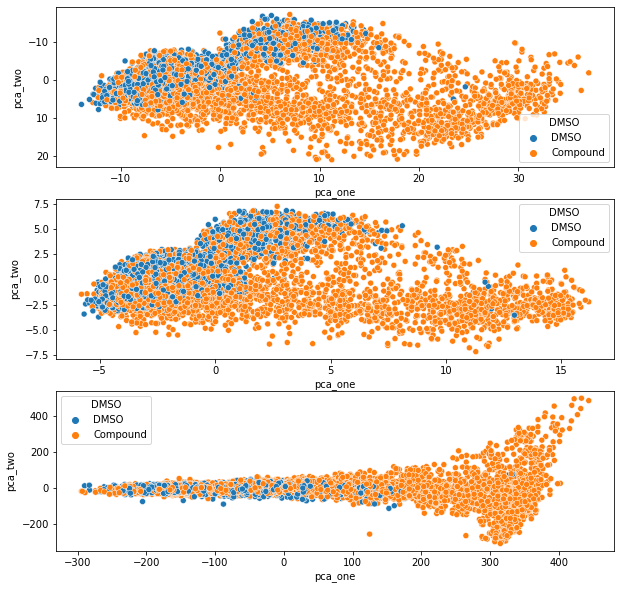

In [14]:
fig, ax =plt.subplots(3,1, figsize=(10,10))
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=res, x="pca_one", y='pca_two', hue='DMSO', ax=ax[0], hue_order=['DMSO', 'Compound'])
gfg = sns.scatterplot(data=eff, x="pca_one", y='pca_two', hue='DMSO', ax=ax[1],hue_order=['DMSO', 'Compound'])
gfg = sns.scatterplot(data=cp, x="pca_one", y='pca_two', hue='DMSO', ax=ax[2],hue_order=['DMSO', 'Compound'])
ax[0].invert_yaxis()
#plt.setp(gfg.get_legend().get_texts(), fontsize='5')

In [18]:
eff_sub = eff.query("Metadata_broad_sample == 'BRD-K09602097-001-13-6'")
res_sub = res.query("Metadata_broad_sample == 'BRD-K09602097-001-13-6'")
cp_sub = cp.query("Metadata_broad_sample == 'BRD-K09602097-001-13-6'")

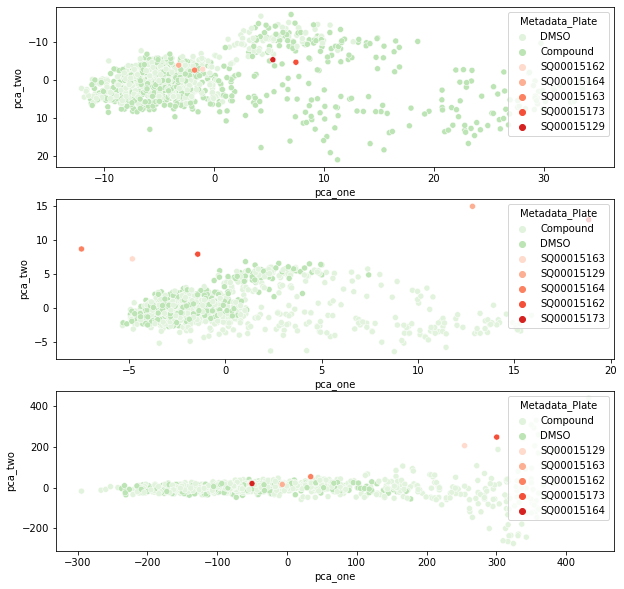

In [31]:
fig, ax =plt.subplots(3,1, figsize=(10,10))
plt.style.use({'figure.facecolor':'white'})
sns.set_palette("Greens")
gfg = sns.scatterplot(data=res.sample(1000), x="pca_one", y='pca_two', hue='DMSO', ax=ax[0])
gfg = sns.scatterplot(data=eff.sample(1000), x="pca_one", y='pca_two', hue='DMSO', ax=ax[1])
gfg = sns.scatterplot(data=cp.sample(1000), x="pca_one", y='pca_two', hue='DMSO', ax=ax[2])
sns.set_palette("Reds")
gfg = sns.scatterplot(data=eff_sub, x="pca_one", y='pca_two', hue='Metadata_Plate', ax=ax[0])
gfg = sns.scatterplot(data=res_sub, x="pca_one", y='pca_two', hue='Metadata_Plate', ax=ax[1])
gfg = sns.scatterplot(data=cp_sub, x="pca_one", y='pca_two', hue='Metadata_Plate', ax=ax[2])
ax[0].invert_yaxis()


In [32]:
eff_rob_DMSO = normalize(
    profiles=eff,
    features=eff_features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='robustize',
    output_file='none'
)
res_rob_DMSO = normalize(
    profiles=res,
    features=res_features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='robustize',
    output_file='none'
)
cp_rob_DMSO = normalize(
    profiles=cp,
    features=cp_features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='robustize',
    output_file='none'
)


In [33]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(eff_rob_DMSO[eff_features].values)
eff['pca_one_rob'] = pca_result[:,0]
eff['pca_two_rob'] = pca_result[:,1]
pca_result = pca.fit_transform(res_rob_DMSO[res_features].values)
res['pca_one_rob'] = pca_result[:,0]
res['pca_two_rob'] = pca_result[:,1]
pca_result = pca.fit_transform(cp_rob_DMSO[cp_features].values)
cp['pca_one_rob'] = pca_result[:,0]
cp['pca_two_rob'] = pca_result[:,1]



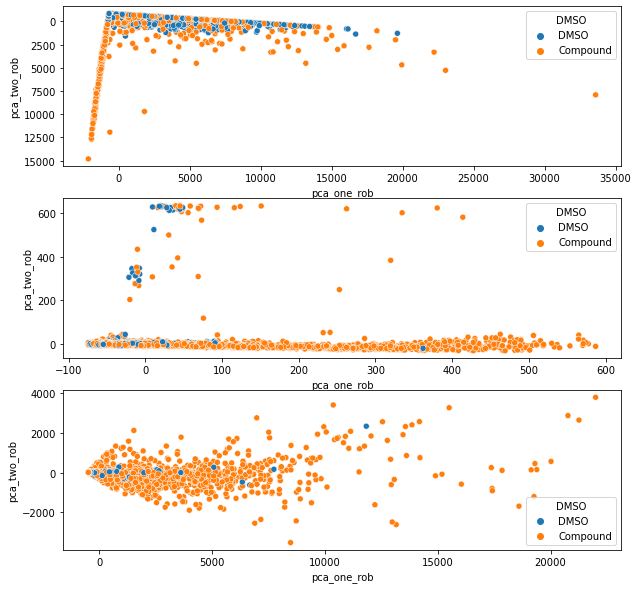

In [35]:
fig, ax =plt.subplots(3,1, figsize=(10,10))
sns.set_palette('tab10')
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=res, x="pca_one_rob", y='pca_two_rob', hue='DMSO', ax=ax[0], hue_order=['DMSO', 'Compound'])
gfg = sns.scatterplot(data=eff, x="pca_one_rob", y='pca_two_rob', hue='DMSO', ax=ax[1],hue_order=['DMSO', 'Compound'])
gfg = sns.scatterplot(data=cp, x="pca_one_rob", y='pca_two_rob', hue='DMSO', ax=ax[2],hue_order=['DMSO', 'Compound'])
ax[0].invert_yaxis()